In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy

In [8]:
leagues = ["standard_delve", "hardcore_delve", "delve", "hc_delve"]

In [9]:
df = pd.read_csv("data/edge_popularity.csv", index_col="edge")

In [10]:
normalized_df = (df-df.min())/(df.max()-df.min())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f6d4470>,
      dtype=object)

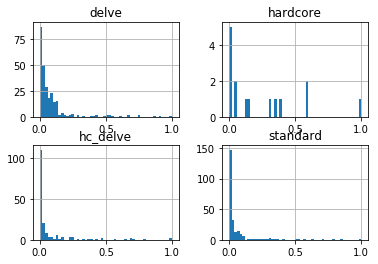

In [18]:
normalized_df.hist(bins=50)

In [12]:
normalized_df.describe()

,hc_delve,delve,standard,hardcore
count,178.000000,271.000000,252.000000,15.000000
mean,0.080058,0.092264,0.066961,0.240816
std,0.175843,0.157190,0.147659,0.295941
min,0.000000,0.000000,0.000000,0.000000
25%,0.003656,0.011249,0.002649,0.006803
50%,0.010617,0.038003,0.012811,0.129252
75%,0.044825,0.093481,0.054640,0.363946
max,1.000000,1.000000,1.000000,1.000000


In [22]:
most_common_edge_thresholds = normalized_df.quantile(.8)
most_common_edge_thresholds

hc_delve    0.082914
delve       0.109464
standard    0.075976
hardcore    0.427211
Name: 0.8, dtype: float64

In [20]:
normalized_df.head(30)

,hc_delve,delve,standard,hardcore
edge,,,,
Chaos Orb-Jewellers Orb,1.000000,0.619810,0.298522,0.054422
Jewellers Orb-Chaos Orb,0.981578,0.488084,0.283055,0.054422
Chaos Orb-Orb of Alchemy,0.786247,0.515663,0.306187,NaN
Orb of Alteration-Chaos Orb,0.702995,0.542952,0.332275,0.129252
Orb of Alchemy-Chaos Orb,0.695542,0.746122,0.419381,NaN
Orb of Fusing-Chaos Orb,0.687386,0.536880,0.259075,0.000000
Chaos Orb-Orb of Fusing,0.658838,0.864940,0.566083,NaN
Chaos Orb-Orb of Chance,0.561243,0.235890,0.719929,NaN
Orb of Chance-Jewellers Orb,0.476304,0.021340,0.031426,NaN


In [15]:
common_profitable_edges = {}
for league in normalized_df.columns:
    edges = []
    for idx, val in enumerate(normalized_df[league]):
        if val >= most_common_edge_thresholds[league]:
            edge = normalized_df.index[idx]
            edges.append(edge)
    common_profitable_edges[league] = sorted(edges)

In [16]:
common_profitable_edges

{'hc_delve': ["Cartographer's Chisel-Chaos Orb",
  "Chaos Orb-Cartographer's Chisel",
  'Chaos Orb-Chromatic Orb',
  'Chaos Orb-Exalted Orb',
  "Chaos Orb-Gemcutter's Prism",
  'Chaos Orb-Jewellers Orb',
  'Chaos Orb-Orb of Alchemy',
  'Chaos Orb-Orb of Alteration',
  'Chaos Orb-Orb of Chance',
  'Chaos Orb-Orb of Fusing',
  'Chaos Orb-Orb of Regret',
  'Chaos Orb-Orb of Scouring',
  'Chaos Orb-Regal Orb',
  'Chaos Orb-Vaal Orb',
  'Chromatic Orb-Chaos Orb',
  'Chromatic Orb-Jewellers Orb',
  'Divine Orb-Chaos Orb',
  'Exalted Orb-Chaos Orb',
  "Gemcutter's Prism-Chaos Orb",
  'Jewellers Orb-Chaos Orb',
  'Jewellers Orb-Orb of Alchemy',
  'Jewellers Orb-Orb of Alteration',
  'Orb of Alchemy-Chaos Orb',
  'Orb of Alchemy-Jewellers Orb',
  'Orb of Alchemy-Orb of Fusing',
  'Orb of Alchemy-Orb of Regret',
  'Orb of Alteration-Chaos Orb',
  'Orb of Alteration-Regal Orb',
  'Orb of Chance-Chaos Orb',
  'Orb of Chance-Jewellers Orb',
  'Orb of Fusing-Chaos Orb',
  'Orb of Fusing-Orb of Alche

In [17]:
import json
with open('data/common_profitable_edges.json', 'w') as outfile:
    json.dump(common_profitable_edges, outfile, indent=4)